# October 17 - r/leafs Fantasy Hockey Standings Analysis

I wanted to take a closer look at variables that affect the rankings in the league, and maybe learn from them to create a strategy. It's still quite early in the season, so we would have to be careful in making claims too emphatically.

In [3]:
# importing the standard data analysis tools for working with & visualzing data in python
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord,"aesthetics")))
%matplotlib inline

In [4]:
# I haven't automated the data scraping yet, just downloaded the table into excel from Yahoo
df = pd.read_csv('standings-oct-17.csv')

In [5]:
# Renaming the columns for clarity
df.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)

In [6]:
# Seperated Player vs. Goalie data
df_players = df[['Rank', 'Team Name', 'PlayerGP', 'G', 'A', '+/-', 'PIM', 'PPP', 'SHP', 'SOG', 'FW', 'HIT', 'BLK']]
df_goalies = df[['Rank', 'Team Name', 'GoalieGP', 'W', 'GAA', 'SA', 'SV%', 'SHO']]

In [7]:
df_goalies.describe()

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,7.400000,3.650000,2.841500,216.85000,0.909800,0.400000
std,5.91608,2.062191,2.254236,0.712529,69.91444,0.019501,0.502625
min,1.00000,3.000000,0.000000,1.430000,88.00000,0.870000,0.000000
25%,5.75000,6.000000,2.000000,2.525000,174.25000,0.900750,0.000000
50%,10.50000,7.000000,4.000000,2.765000,216.00000,0.910500,0.000000
75%,15.25000,9.000000,5.000000,3.137500,263.00000,0.920000,1.000000
max,20.00000,12.000000,8.000000,4.730000,395.00000,0.957000,1.000000


In [8]:
df_goalies.median()

Rank         10.5000
GoalieGP      7.0000
W             4.0000
GAA           2.7650
SA          216.0000
SV%           0.9105
SHO           0.0000
dtype: float64

In [9]:
df_goalies_sorted_bySA = df_goalies.sort_values('SA', ascending=False)
df_goalies_sorted_byGP = df_goalies.sort_values('GoalieGP', ascending=False)
df_goalies_sorted_bySVP = df_goalies.sort_values('SV%', ascending=False)
df_goalies_sorted_byGAA = df_goalies.sort_values('GAA', ascending=False)
df_goalies_sorted_byW = df_goalies.sort_values('W', ascending=False)


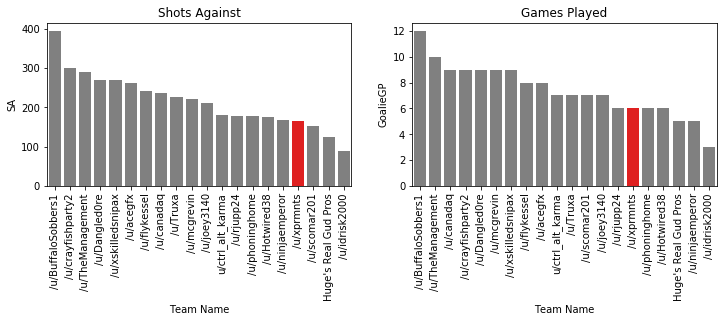

In [74]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,3))

clrs = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySA['Team Name']]
sns.barplot(x='Team Name', y='SA', data=df_goalies_sorted_bySA, palette=clrs, ax=ax1)
ax1.set_title('Shots Against')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
clrs2 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byGP['Team Name']]
sns.barplot(x='Team Name', y='GoalieGP', data=df_goalies_sorted_byGP, palette=clrs2, ax=ax2)
ax2.set_title('Games Played')
for item in ax2.get_xticklabels():
    item.set_rotation(90)


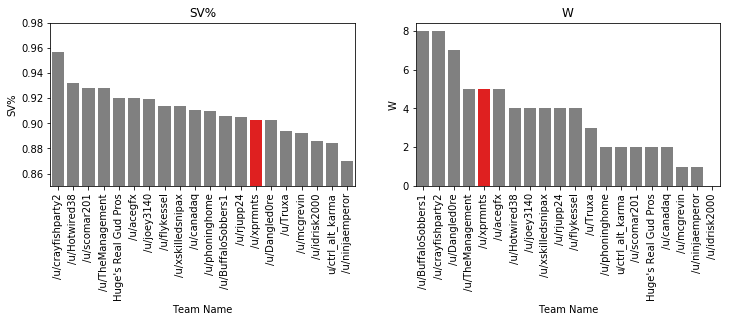

In [79]:
fig,(ax3,ax4) = plt.subplots(ncols=2, figsize=(12,3))
clrs3 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_bySVP['Team Name']]
sns.barplot(x='Team Name', y='SV%', data=df_goalies_sorted_bySVP, palette=clrs3, ax=ax3)
for item in ax3.get_xticklabels():
    item.set_rotation(90)
ax3.set_title('SV%')
ax3.set_ylim([.85,.98])

clrs4 = ['red' if ( x == '/u/xprmnts') else 'grey' for x in df_goalies_sorted_byW['Team Name']]
sns.barplot(x='Team Name', y='W', data=df_goalies_sorted_byW, palette=clrs4, ax=ax4)
for item in ax4.get_xticklabels():
    item.set_rotation(90)
ax4.set_title('W')

In [80]:
# Examining the correlation in statistics for goalies
df_goalies_corr = df_goalies.corr()
df_goalies_corr.sort_values('Rank', ascending=False)

,Rank,GoalieGP,W,GAA,SA,SV%,SHO
Rank,1.000000,0.634163,0.688666,-0.618475,0.626243,0.650555,0.460195
W,0.688666,0.654404,1.000000,-0.423669,0.776081,0.539498,0.362325
SV%,0.650555,0.326674,0.539498,-0.936378,0.314522,1.000000,0.389844
GoalieGP,0.634163,1.000000,0.654404,-0.217136,0.939708,0.326674,0.446844
SA,0.626243,0.939708,0.776081,-0.142308,1.000000,0.314522,0.446625
SHO,0.460195,0.446844,0.362325,-0.319198,0.446625,0.389844,1.000000
GAA,-0.618475,-0.217136,-0.423669,1.000000,-0.142308,-0.936378,-0.319198


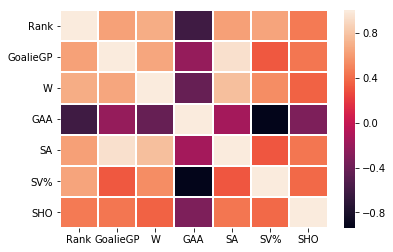

In [81]:
sns.heatmap(df_goalies.corr(), linewidths=1)

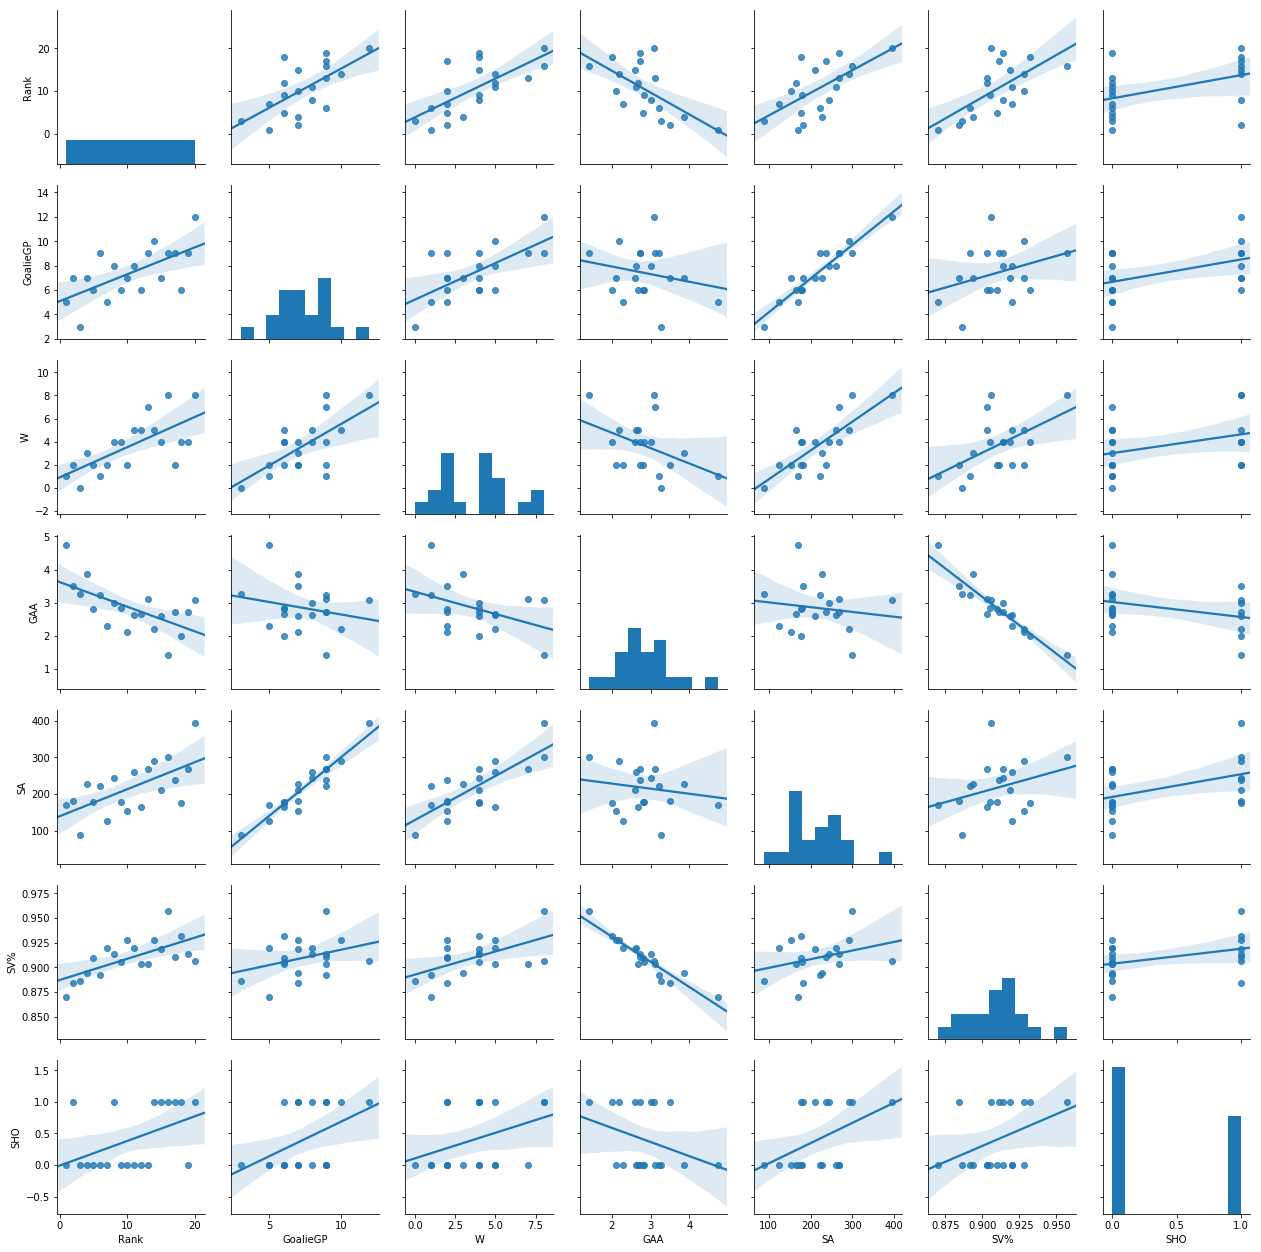

In [82]:
sns.pairplot(data=df_goalies,kind='reg')

### Goalie effects

After examining the tables and plots above we can come to a few conclusions:
1. the goals against average is not strongly correlated with rankings
2. Shots Against(SA), Wins(W), Save %(SV%) & Shutouts(SHO) are positively correlated in the order presented
3. Shot's Against has the strongest correlation with GamesPlayed - which is common sense and is nicely corroborated by the data - this indicates that I should try to increase the volume of games played for my Goalies.

My predicament when I joined the league was that I did not pick good goalies during the draft, so I am left with scraps, but based on the data above it turns out the most important factor (SA) in influencing rank can be manipulated easily despite my poor goalie selection during the draft. I can try to pick up goalies in free agency and cycle through them based on their upcoming schedule (add them before they are likely to play and drop them promptly after they play). It remains to be seen how wins & save % will shake out as the rest of the season goes. Might have to re-evaluate this strategy after a certain point and perhaps trade for a goalie that might have better win and save % stats.

In [ ]:
df_players.describe()

In [ ]:
df_players.median()

In [ ]:
sns.heatmap(df_players.corr(), linewidths=1)

In [ ]:
df_players_corr = df_players.corr()

In [ ]:
df_players_corr.sort_values('Rank', ascending=False)

In [ ]:
sns.jointplot(x=df_players['PlayerGP'],y=df_players['SOG'],data=df_players, kind='reg')

In [ ]:
sns.pairplot(data=df_players,kind='reg')

In [ ]:
df_all_corr = df.corr()

In [ ]:
df_all_corr.sort_values('Rank', ascending=False)